In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [42]:
A = norm(42,7.48).rvs(9)
B = norm(50,6.48).rvs(4) 

(0.0, 1.0)

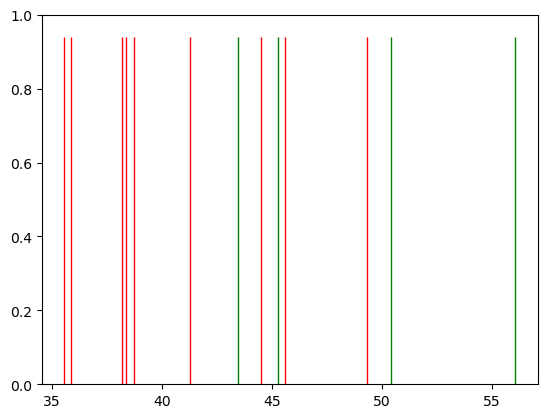

In [26]:
plt.plot(A, 0*A, '|', color='red', markersize=500)
plt.plot(B, 0*B, '|', color='green', markersize=500)
plt.ylim(0,1)

### F-test

An F-test is any statistical test used to compare the variances of two samples or the ratio of variances between multiple samples. The test statistic, random variable F, is used to determine if the tested data has an F-distribution under the true null hypothesis, and true customary assumptions about the error term (ε). It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. Exact "F-tests" mainly arise when the models have been fitted to the data using least squares. The name was coined by George W. Snedecor, in honour of Ronald Fisher. Fisher initially developed the statistic as the variance ratio in the 1920s.


Define Hypotheses:

Null Hypothesis $H_0$: The variances of A and B are equal, $σ_A^2=σ_B^2$, $σ_A^2​=σ_B^2$​.

Compute the F-statistic:

The F-statistic is computed as the ratio of the sample variances: $F=\tfrac{s_A^2}{s_B^2}$​​, where $s_A^2$​ is the variance of A and $s_B^2$ is the variance of B.
Since we are conducting a two-sided test, we compare the computed F-statistic to critical values from the F-distribution.

p-value close to 1: we do not reject the null hypothesis that the variances of A and B are equal. No significant difference in variance between the two datasets, supporting the assumption that the populations may have similar variances.


In [35]:
from scipy.stats import f

var_A = 7.48**2
var_B = 6.48**2

F_statistic = var_A / var_B if var_A > var_B else var_B / var_A

df1 = len(A) - 1
df2 = len(B) - 1

# p-value for a two-tailed F-test
p_value = 2 * min(f.cdf(F_statistic, df1, df2), 1 - f.cdf(F_statistic, df1, df2))

# Output the results
print("F-statistic:", F_statistic)
print("p-value:", p_value)

F-statistic: 1.332456942539247
p-value: 0.8958602517465144


### t-test

Student's t-test is a statistical test used to test whether the difference between the response of two groups is statistically significant or not. It is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. It is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known (typically, the scaling term is unknown and is therefore a nuisance parameter). When the scaling term is estimated based on the data, the test statistic—under certain conditions—follows a Student's t distribution. The t-test's most common application is to test whether the means of two populations are significantly different. In many cases, a Z-test will yield very similar results to a t-test because the latter converges to the former as the size of the dataset increases. 

There are several types of t-tests, each suited for different experimental setups. Here's an overview of the most commonly used ones:
1. One-Sample t-test

    Compares the mean of a single sample to a known value (often a population mean).
    Used when you want to check if the sample mean differs significantly from a hypothesized value.

2. Two-Sample (Independent) t-test

    Compares the means of two independent groups to see if there is a statistically significant difference between them.
    Assumptions:
        The data in each sample are independent.
        The data are normally distributed in each group (especially important for small sample sizes).
        The variances of the two groups can either be assumed to be equal (standard t-test) or not (Welch's t-test).
    Welch's t-test: A variation of the two-sample t-test that does not assume equal variances between the two groups.

3. Paired t-test

    Compares the means of two related groups (e.g., measurements before and after a treatment on the same individuals).
    Used for "within-subject" designs, where the same subjects are used in both conditions.

Assuming two independent samples with means $\bar{X_1}$ and $\bar{X_2}$​, sample sizes $n_1$​ and $n_2$​, and standard deviations $s_1$ and $s_2$​:

$$t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$



In [41]:
from scipy.stats import ttest_ind

# two-sample t-test assuming unequal variances (Welch's t-test)
t_statistic, p_value = ttest_ind(A, B, equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 0.3161985890349058
p-value: 0.7605189180463248


In [43]:
#### BIG PROBLEM HERE!!